# Fake Instagram Account Dettection 


# DATASET DESCRIPTION

Context
Fakes and spammers are a major problem on all social media platforms, including Instagram.
This is the project in which I set out to find ways of detecting them using machine learning.
In this dataset fake and spammer are interchangeable terms.

Content
I have personally identified the spammer/fake accounts included in this dataset after carefully examining each instance and as such the dataset has high level of accuracy though there might be a couple of misidentified accounts in the spammers list as well.
The dataset has been collected using a crawler from 15-19, March 2019.


# Importing Libraries 

In [1]:
!pip install shap
!pip install lightgbm
!pip install xgboost

In [2]:
import pandas as pd, numpy as np, plotly.express as px# manipulation and numerical operations
import plotly.graph_objects as go  # DataVisualisation
from plotly.subplots import make_subplots # DataVisualisation
import matplotlib.pyplot as plt # DataVisualisation
import seaborn as sns # DataVisualisation
from sklearn.pipeline import Pipeline # Pipeline for chaining multiple data preprocessing steps
from sklearn.preprocessing import StandardScaler # Data rescaling
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split # Data splitting 
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score # Evaluation Metrics
from sklearn.preprocessing import FunctionTransformer
import shap # Machine Learning explainability librart

# Models
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Importing Dataset

We have taken two datasets 
1. Training Dataset
2. Testing Dataset

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# Data Overveiw of Training Dataset

In [4]:
train.shape

(576, 12)

In [5]:
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
train.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [7]:
train.info

<bound method DataFrame.info of      profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     na

In [8]:
train.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

# Data Owerview of Testing Dataset

In [9]:
test.shape

(120, 12)

In [10]:
test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [11]:
test.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


In [12]:
test.info

<bound method DataFrame.info of      profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
115            1                  0.29               1                  0.00   
116            1                  0.40               1                  0.00   
117            1                  0.00               2                  0.00   
118            0                  0.17               1                  0.00   
119            1                  0.44               1                  0.00   

     na

In [13]:
test.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

# Summary Statistics 

In [14]:
train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [15]:
test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


# Inspection of the Train and Test Dataset

In [16]:
def inspect(df):
    print('\n')
    print('Missing Values: ')
    print('\n')
    print(df.isnull().sum())
    print('\n')
    print("NaN Values: ")
    print('\n')
    print(df.isna().sum())
    print('Duplicated Values: ') 
    print(df.duplicated().sum())
    print(f'Rows: {df.shape[0]}')
    print(f'Attributes: {df.shape[1]}')
    print('\n')
   
    

In [17]:
inspect(train)



Missing Values: 


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


NaN Values: 


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64
Duplicated Values: 
2
Rows: 576
Attributes: 12




In [18]:
inspect(test)



Missing Values: 


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


NaN Values: 


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64
Duplicated Values: 
2
Rows: 120
Attributes: 12





In this project, I aim to analyze and classify Instagram profiles to determine whether they are fake or not based on various features. By inspecting my data, I gathered several key insights:

First, I found that there are **no missing values**, and all features in my dataframes are **numeric**. The datasets are relatively small, with the largest one containing only **576 data samples**. I identified **two duplicate entries** in each dataframe that need to be addressed. Additionally, my dataframes are organized with a mix of **continuous and binary features**.

Here are the features I have at my disposal:

- **Profile Pic:** This binary feature indicates whether an account has a profile picture (1) or not (0).

- **Nums/Length Username:** A continuous feature representing the ratio of numerical characters to the total length of an account's username.

- **Fullname Words:** A continuous feature that counts the total number of words in the account holder's full name.

- **Nums/Length Fullname:** A continuous feature indicating the ratio of numerical characters to the total length of the person's full name.

- **Name == Username:** A binary feature that indicates if the person's name is the same as their username (1) or not (0).

- **Description Length:** A continuous feature representing the length of the profile description, likely the bio.

- **External URL:** A binary feature indicating if a profile includes a link to an external website in its bio (1) or not (0).

- **Private:** A binary feature indicating whether the profile is private (1) or not (0).

- **#Posts:** A continuous feature that contains the number of posts made by the profile.

- **#Followers:** A continuous feature representing the total number of followers the account has.

- **#Follows:** A continuous feature indicating the total number of accounts the profile follows.

- **Fake:** The target variable, which indicates whether an account is fake (1) or not (0).

By leveraging these features, I aim to build a model that can accurately classify whether an Instagram account is fake. This documentation will guide you through the various stages of my machine learning project, including data preprocessing, feature engineering, model training, and evaluation.


# Handiling the Duplicate Values from Training and Test Dataset

# Train Dataset

In [19]:
# Visualizing duplicated rows in the training set
train_duplicated = train[train.duplicated(keep=False)]
train_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
196,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
491,1,0.91,1,0.0,0,0,0,0,0,75,26,1
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


Duplicated rows can introduce bias to the model and lead to overfitting. Therefore, I am going to drop these rows to ensure the integrity and performance of our model. 


In [20]:
# Removing duplicates
train.drop_duplicates(inplace = True)
# Printing new rows count
print('\n')
print(f'Train new rows count: {train.shape[0]}')



Train new rows count: 574


# Test Dataset

In [21]:
# Visualizing duplicated rows in the training set
test_duplicated = test[test.duplicated(keep=False)]
test_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
61,1,0.27,1,0.0,0,0,0,0,0,45,64,1
63,0,0.00,1,0.0,1,0,0,0,0,69,694,1
67,0,0.00,1,0.0,1,0,0,0,0,69,694,1
83,1,0.27,1,0.0,0,0,0,0,0,45,64,1


Duplicated rows can introduce bias to the model and lead to overfitting. Therefore, I am going to drop these rows to ensure the integrity and performance of our model. 


In [22]:
# Removing duplicates
test.drop_duplicates(inplace = True)

# Printing new rows count
print('\n')
print(f'Test new rows count: {test.shape[0]}')



Test new rows count: 118


To facilitate plotting and analysis later on, I'm going to create a function to store each feature into separate lists: `continuous_features` and `binary_features`. This will help us group the features together based on their data type.

In [23]:
# Defining a function to categorize features
def categorize_features(df):
    # creating empty lists
    continuous_features = []
    binary_features = []
    
    for col in df.columns:
        if df[col].nunique() <=2: # if the number of unique values per feature is either equal or smaller than 2, it gets appended to the binary_features list
            binary_features.append(col)
        else:
            continuous_features.append(col) # In case it has more unique values than 2, it get appended to the continuous_feature list
    return continuous_features, binary_features

In [24]:
# Creating lists with the function
continuous_features, binary_features = categorize_features(train)

In [25]:
# Printing feature categorizations
print('\n')
print('Continuous features:')
print(continuous_features)
print('\n')
print('Binary features:')
print(binary_features)



Continuous features:
['nums/length username', 'fullname words', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']


Binary features:
['profile pic', 'name==username', 'external URL', 'private', 'fake']


# Exploratory Data Analysis

# Binary Features

In [26]:
binary_features.remove('fake') # Removing target variable from the list
# Creating another dataframe to label real and fake accounts
newdf = train.copy()
newdf['fake'] = newdf['fake'].replace({0: 'Real Accounts', 1: "Fake Accounts"}) 

# plotting barplots for each binary feature
def create_barplots(df, newdf):
    for feature in binary_features:
        fig = px.histogram(train, x=feature, color=newdf['fake'],
                           color_discrete_sequence=['#636EFA','#EF553B'],
                           barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})
        
        fig.update_layout(title=f'{feature}?',
                          xaxis_title=feature, yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                               tickvals=[0, 1],
                                                                               ticktext=['No', 'Yes']
                                                                               ),
                     height = 650)
        
        fig.show()

In [27]:
create_barplots(train,newdf)

## Insights 💡

After examining the distributions of various features, some interesting patterns emerge:

1. **Profile Picture:** Most accounts with no profile picture are fake accounts.

2. **Name == Username:** Overall, most accounts where the name matches the username are also fake accounts.

3. **External URL:** Surprisingly, it seems that all accounts with an external URL in their bios are real accounts. Additionally, most accounts do not have an external URL.

4. **Privacy Setting:** The majority of accounts that are not private are fake accounts, while most accounts that are indeed private are real accounts.


# Continuous Features

Next, let's examine the distribution of continuous variables to identify potential differences between real and fake accounts.

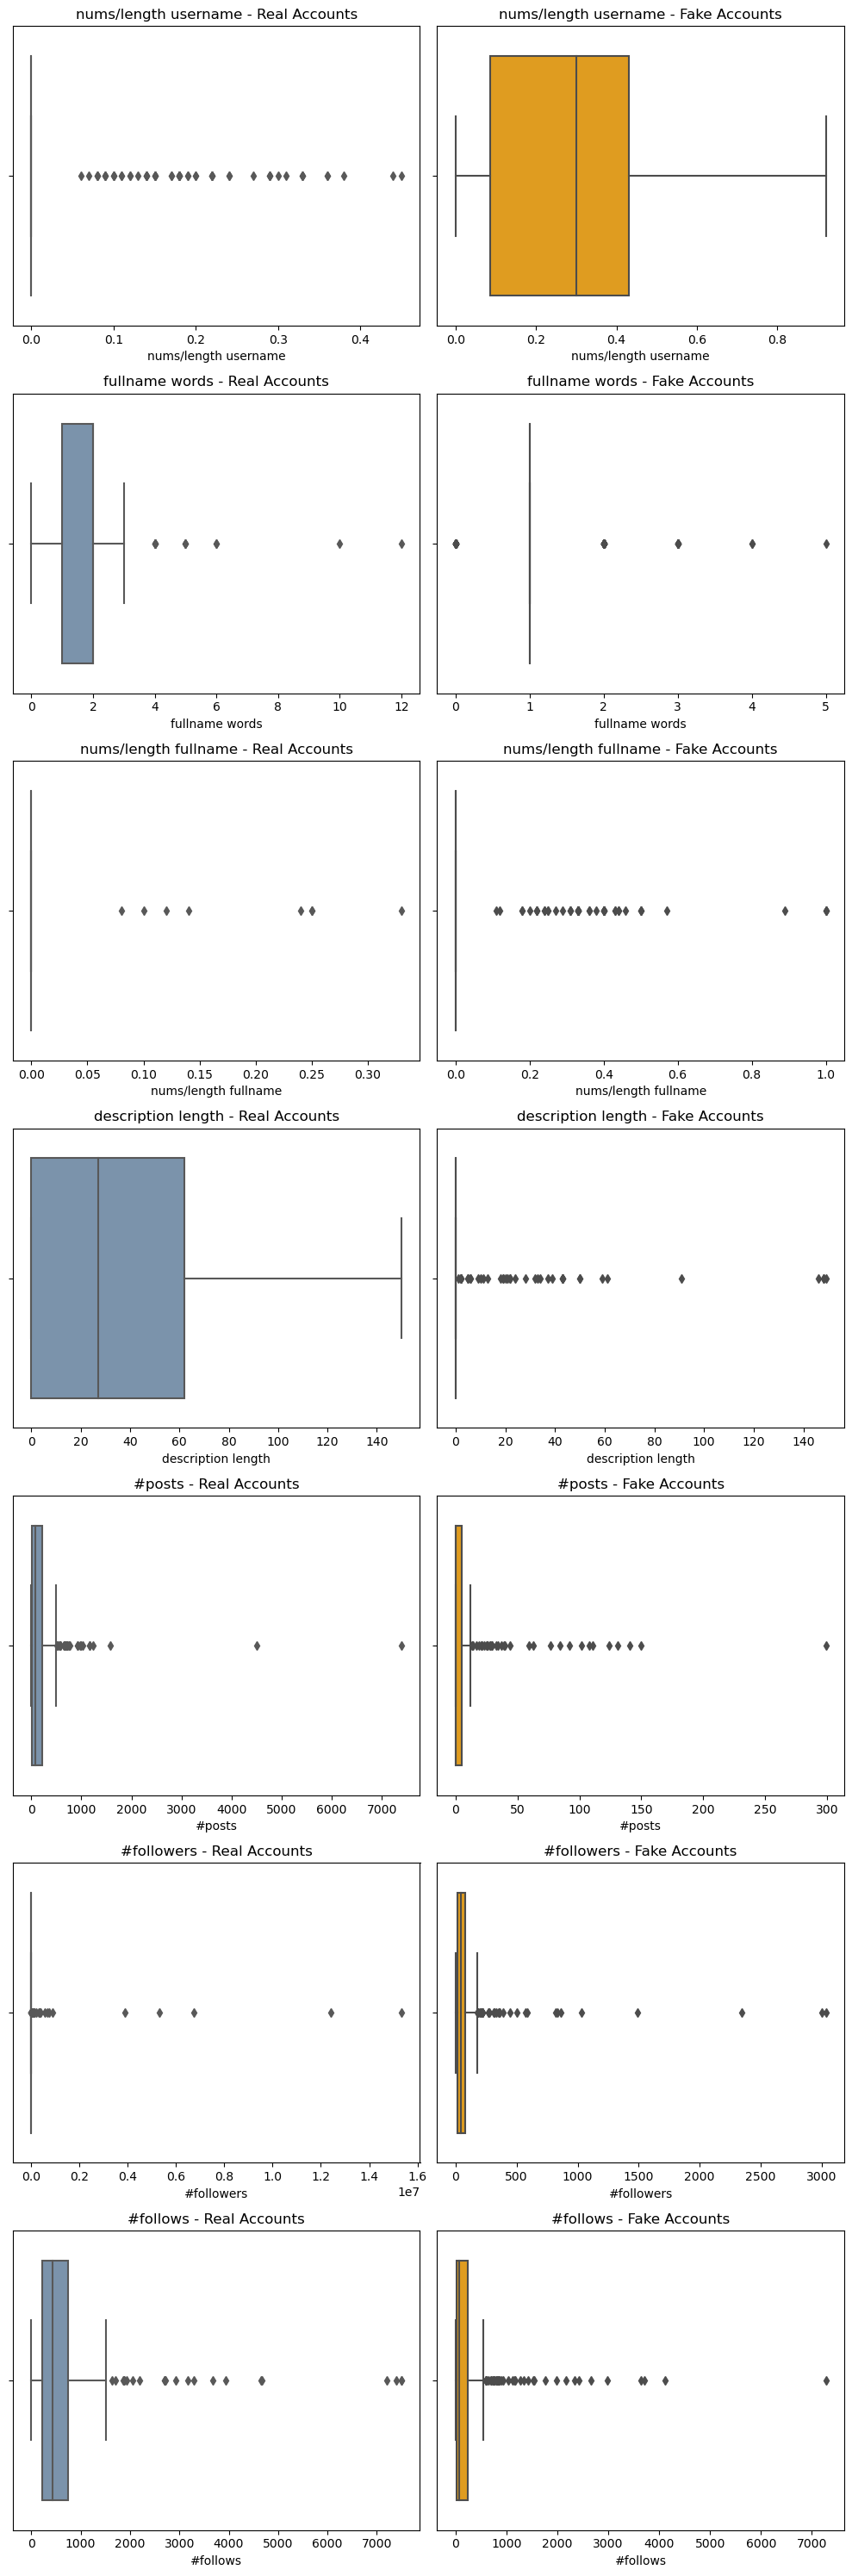

In [28]:
# Plotting Boxplots
fig, axes = plt.subplots(nrows=len(continuous_features), ncols=2, figsize=(10, 30))

for i, col in enumerate(continuous_features):
    sns.boxplot(data=train[train['fake'] == 0], x=col, ax=axes[i, 0], color = '#7393B3')
    sns.boxplot(data=train[train['fake'] == 1], x=col, ax=axes[i, 1], color = 'orange')
    axes[i, 0].set_title(col + " - Real Accounts")
    axes[i, 1].set_title(col + " - Fake Accounts")

plt.tight_layout()
plt.show()

## Insights 💡

After examining the distribution of continuous variables, several patterns emerge:

1. **Username Composition:** Fake accounts tend to have a larger percentage of numbers in their usernames.

2. **Full Name Length:** Fake accounts tend to have fewer words in their full names compared to real accounts.

3. **Description Length:** Excluding outliers, fake accounts have much smaller descriptions/bios compared to real accounts.

4. **Number of Posts:** Real accounts have significantly more posts than fake accounts.

5. **Number of Followers:** Real accounts have a much larger number of followers compared to fake accounts.

6. **Following Ratio:** Excluding outliers, it appears that fake accounts tend to follow fewer people on average compared to real accounts.

These insights provide valuable information about the distinguishing characteristics between real and fake accounts. 

Given the presence of outliers in our data, I've decided to proceed with building a Random Forest baseline and using Gradient Boosting Algorithms for predictions. These algorithms are robust to outliers and can provide reliable predictions even in the presence of such data points.


# Target Variable

Text(0, 0.5, 'Count')

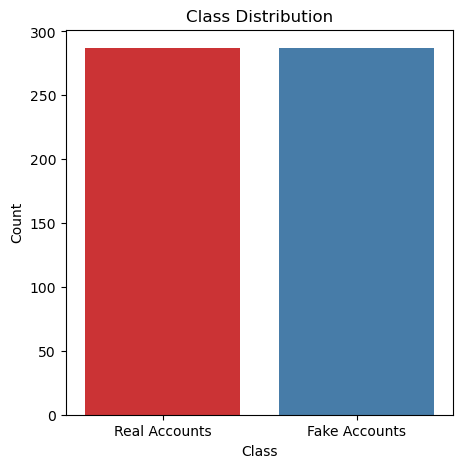

In [29]:
plt.figure(figsize=(5, 5))
sns.countplot(data=newdf, x='fake', palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

Upon inspection, it appears that there is no significant class imbalance in the target variable, which indicates that the number of fake and real accounts is relatively balanced. This is beneficial for our modeling process, as it reduces the risk of bias towards the majority class and ensures that our model's predictions are well-calibrated across both classes.

# Random Forest Classifier 



AUC-ROC Baseline:  0.92




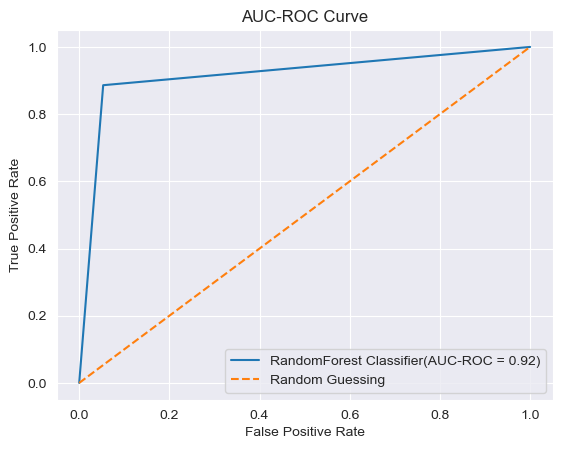



y_val value counts
0    94
1    79
Name: fake, dtype: int64


predicted value counts
(array([0, 1], dtype=int64), array([98, 75], dtype=int64))


In [30]:
# Training, predicting and evaluating baseline

# Splitting dataset into independent variables (X) and target variable (y)
X = train.drop('fake', axis = 1)
y = train['fake']

# Creating training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initializing mode
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train) # Fitting to training data 

y_pred = rf.predict(X_val) # Predicting on validation set
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds})

baseline_score = roc_auc_score(y_val, y_pred)
print('\n')
print('AUC-ROC Baseline: ', baseline_score.round(2))
print('\n')

sns.set_style('darkgrid')
sns.lineplot(x='FPR', y='TPR', data=roc_df, label=f'RandomForest Classifier(AUC-ROC = {baseline_score.round(2)})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('\n')
print('y_val value counts')
print(y_val.value_counts())
print('\n')
print('predicted value counts')
print(np.unique(y_pred, return_counts=True))

The baseline model performed extremely well, with an AUC-ROC score of 0.92.

The original y_val set had 94 real accounts and 79 fake accounts. Our classifier predicted 98 real accounts and 75 fake accounts.

Now, for feature selection, we may use the SHAP library to plot a bar plot containing the importance that each feature displayed for predicting the target variable

## Baseline Model Performance

The baseline model, consisting of Random Forest and Gradient Boosting Algorithms, exhibited exceptional performance, achieving an impressive AUC-ROC score of 0.92. This indicates that the model's ability to distinguish between real and fake accounts is highly accurate.

Upon evaluation, the original validation set contained 94 real accounts and 79 fake accounts. The classifier predicted 98 real accounts and 75 fake accounts. These results demonstrate the model's effectiveness in correctly identifying both real and fake accounts.

## Feature Importance Analysis using SHAP

To gain insights into the importance of each feature in predicting the target variable, we will utilize the SHAP (SHapley Additive exPlanations) library. We will generate a bar plot illustrating the importance of each feature in the model's predictions.


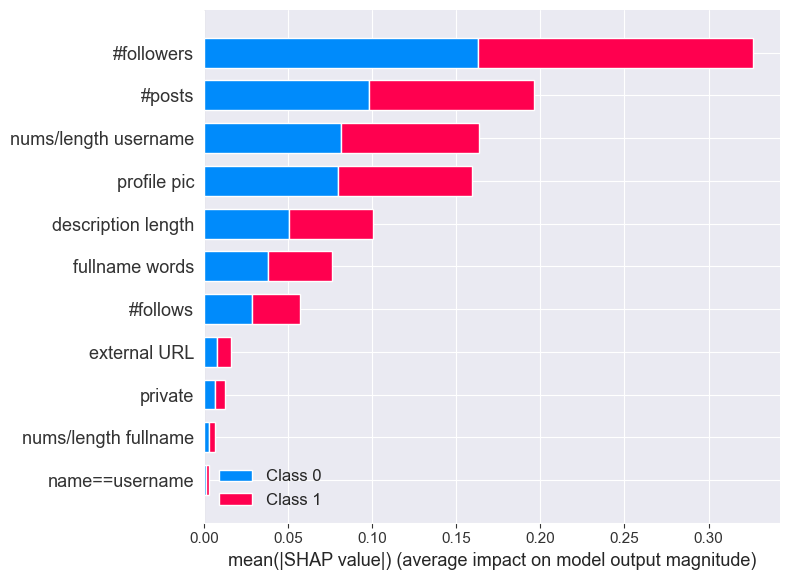

In [31]:
# Plotting Feature Importance plot
shap_values = shap.TreeExplainer(rf).shap_values(X_val)
shap.summary_plot(shap_values, X_val, plot_type="bar")

## Feature Importance Analysis

Upon analyzing the feature importance using the SHAP library, it became apparent that all features played a role in predicting the target variable. There were no features identified as dead weight, indicating that each attribute contributed to the model's predictive power.


## Feature Engineering

During our exploration of the data, two new features have been identified as potentially relevant for predicting the target variable:

### 1. Activity Ratio

The Activity Ratio measures an account's posting activity relative to the number of followers it has. It is calculated using the following equation:

Activity Ratio = Number of Posts / Number of Followers

This feature provides insight into how active an account is relative to its follower count.

### 2. #Followers > #Follows ?

The "#Followers > #Follows ?" feature is a binary indicator that assesses whether an account has more followers than the number of accounts it follows. It is represented as follows:

- If an account has more followers than follows, the feature is tagged as 1.
- If an account has an equal or greater number of follows than followers, the feature is tagged as 0.

This feature is based on the assumption that fake accounts typically have a higher number of follows compared to followers, whereas real accounts tend to have more followers.

Let's proceed with creating these new features and incorporating them into our dataset.


In [32]:
# create activity ratio feature
train['activity ratio'] = np.round(train['#posts'] / train['#followers'], 2)

# Does the account have more followers than follows?
train['#followers > #follows?'] = (train['#followers'] > train['#follows']).astype(int)

In [33]:
# Visualizing new features on the dataframe
train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,activity ratio,#followers > #follows?
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0,0.03,1
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0,0.10,1
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0,0.08,1
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0,1.64,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0,0.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1,0.20,0
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1,0.67,0
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1,0.04,0
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1,0.00,0


## Visualization of New Features

Now that we've added the new features to our dataframe, let's visualize their distribution and relationship with the target variable to see if they provide any valuable insights.


In [35]:
fig = px.histogram(train, x=train['#followers > #follows?'], color=newdf['fake'],
                   color_discrete_sequence=['#636EFA','#EF553B'],
                   barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})
        
fig.update_layout(title='More Followers than Follows Distribution',
                  xaxis_title='#followers > #follows?', yaxis_title='Count', xaxis=dict(tickmode='array',
                  tickvals=[0, 1],
                  ticktext=['No', 'Yes']),
                  height = 800)
        
fig.show()

## Insights 💡

Upon visualizing the new features 'Activity Ratio' and '#Followers > #Follows' and their relationship with the target variable 'fake', another relevant pattern emerged:

- **Followers vs. Follows Ratio:** The majority of accounts that follow more people than they are followed by tend to be fake accounts, whereas accounts with more followers than following tend to be real accounts. This observation validates our prior deduction and provides further evidence that this feature is relevant for predicting the authenticity of Instagram accounts.

This insight adds to our understanding of the distinguishing characteristics between real and fake accounts and reinforces the importance of feature engineering in improving the predictive performance of our models.



In [37]:
# Plotting Activity Ratio plot
fig = px.box(train, x='fake', y='activity ratio', color = newdf['fake'], title = "Activity Ratio")

fig.update_layout(xaxis_title="Real/Fake", yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                               tickvals=[0, 1],
                                                                               ticktext=['Real Accounts', 'Fake Accounts']
                                                                               ),
                     height = 650)

# Show the plot
fig.show()

## Data Integrity Check

After performing feature engineering, it's essential to verify the integrity of our data by checking for null and infinite (inf) values. Let's proceed with this verification.



In [38]:
train.isnull().sum()

profile pic                0
nums/length username       0
fullname words             0
nums/length fullname       0
name==username             0
description length         0
external URL               0
private                    0
#posts                     0
#followers                 0
#follows                   0
fake                       0
activity ratio            15
#followers > #follows?     0
dtype: int64

In [39]:
train.isin([np.inf, -np.inf]).sum()

profile pic               0
nums/length username      0
fullname words            0
nums/length fullname      0
name==username            0
description length        0
external URL              0
private                   0
#posts                    0
#followers                0
#follows                  0
fake                      0
activity ratio            3
#followers > #follows?    0
dtype: int64

## Handling Missing and Infinite Values

The 'Activity Ratio' feature generated some missing and infinite values. To maintain data integrity, we will remove these rows from our dataframe.

In [40]:
# replace infinite values with NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows containing NaN values
train.dropna(inplace=True)

# Modeling

In [41]:
# Measuring mean values and standard deviations
df_means = train.mean().round(2)
df_stds = train.std().round(2)
results = pd.concat([df_means, df_stds], axis = 1)
results.columns = ['Mean', 'Standard Deviation']
results

,Mean,Standard Deviation
profile pic,0.72,0.45
nums/length username,0.16,0.21
fullname words,1.47,1.06
nums/length fullname,0.04,0.13
name==username,0.03,0.18
description length,23.27,38.13
external URL,0.12,0.33
private,0.37,0.48
#posts,110.94,408.69
#followers,88366.21,926256.64


## Feature Scaling

To address the issue of features being on different scales, particularly `#followers` and `#follows` which are on a much larger scale compared to other features in the dataframe, we will add another step to our pipelines to rescale these features.

In [42]:
# Splitting Independent Features X and target variable y
X = train.drop('fake', axis = 1)
y = train.fake

In [43]:
# Spitting data into training and validation sets. 35% of data will be used for validation
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size = 0.35, random_state = 123)

XGBoost: AUC-ROC score = 0.90
[LightGBM] [Info] Number of positive: 181, number of negative: 180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501385 -> initscore=0.005540
[LightGBM] [Info] Start training from score 0.005540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

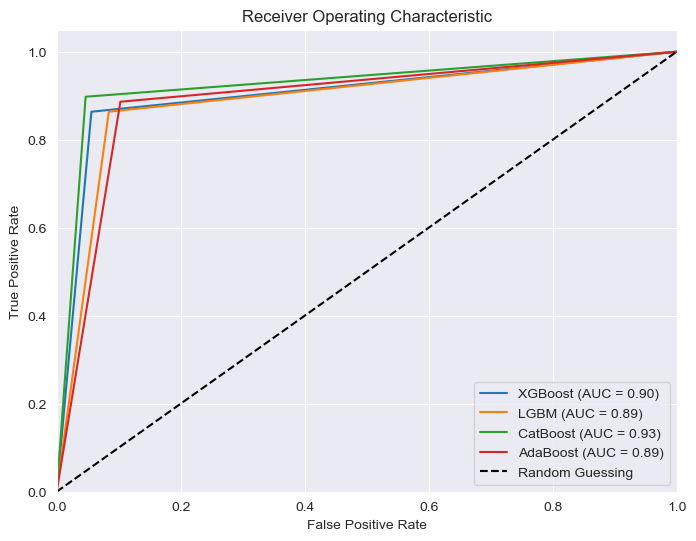

In [44]:
# Defining models
models = {
    "XGBoost": XGBClassifier(random_state = 42),
    "LGBM": LGBMClassifier(random_state = 42),
    "CatBoost": CatBoostClassifier(verbose=False, random_state = 42),
    "AdaBoost": AdaBoostClassifier(random_state = 42)
}

# Defining the pipeline process for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ("scaler", StandardScaler()), # Rescaling data
        ("model", model) # Initializing model
    ])

# Fitting and computing AUC-ROC scores
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    results[name] = {
        "pipeline": pipeline,
        "auc": auc
    }
    print(f"{name}: AUC-ROC score = {auc:.2f}")

# Plot AUC-ROC curve for all models
plt.figure(figsize=(8, 6))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_val, result["pipeline"].predict(X_val))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation

After experimenting with various machine learning models, including Random Forest Classifier (RFC) and CatBoost, we found that the CatBoost model achieved the highest performance, outperforming the RFC.


# Testing

In [45]:
# Creating activity ratio feature
test['activity ratio'] = np.round(test['#posts'] / test['#followers'], 2)

# Does the account has more followers than follows?
test['#followers > #follows?'] = (test['#followers'] > test['#follows']).astype(int)

# replace infinite values with NaN
test.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows containing NaN values
test.dropna(inplace=True)

In [46]:
test # Displaying test set

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,activity ratio,#followers > #follows?
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0,0.07,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0,0.09,1
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0,0.97,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0,0.02,1
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1,0.11,0
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1,0.03,0
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1,0.00,0
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1,0.00,0


In [47]:
X = test.drop('fake', axis = 1) # Independent variables
y = test.fake # target variable 

In [48]:
X # Displaying independent variables

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,activity ratio,#followers > #follows?
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0.07,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0.09,1
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0.97,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0.02,1
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,0.11,0
116,1,0.40,1,0.00,0,0,0,0,4,150,164,0.03,0
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,0.00,0
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,0.00,0


In [49]:
y.value_counts() # Counting values for the target variable

0    60
1    56
Name: fake, dtype: int64

In [50]:
catboost_pipeline = results["CatBoost"]["pipeline"] # Creating a CatBoost model

y_pred = catboost_pipeline.predict(X) # Predicting on test data 

CatBoos: AUC-ROC score on unseen data = 0.9214


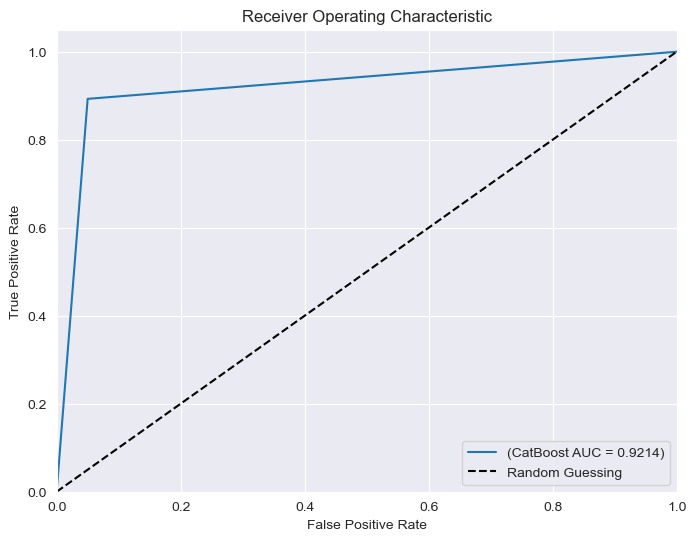

Value counts for y:
0    60
1    56
Name: fake, dtype: int64


Value counts for y_pred:
0    63
1    53
dtype: int64




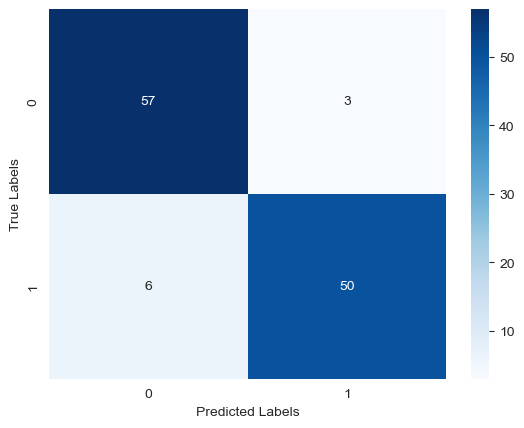



Recall Score: 89.0%


In [51]:
# Computing AUC-ROC score
auc = roc_auc_score(y, y_pred)
print(f"CatBoos: AUC-ROC score on unseen data = {auc:.4f}")

# Plotting ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y, catboost_pipeline.predict(X))
plt.plot(fpr, tpr, label=f"(CatBoost AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Printing value counts
print("Value counts for y:")
print(y.value_counts())
print('\n')
print("Value counts for y_pred:")
print(pd.Series(y_pred).value_counts())
print('\n')
# Plotting confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(f'Recall Score: {np.round(recall_score(y, y_pred),2) * 100}%') # Printing Recall Score



Our final model has reached an AUC-ROC score of 0.9214, indicating that it is efficient in classifying and identifying fake Instagram accounts.

In the original y test, we have 60 real accounts and 56 fake accounts, while our model identified 63 real accounts and 53 fake accounts. We can see, on the Confusion Matrix that we've had 6 false negatives, that is, 6 fake accounts that the model classified as real. We've also had 3 fake positives, which are real accounts that the model identified as fake.

Finally, the Recall Score shows us that the model correctly flagged 89% of fake accounts, 50 out of 56.

## Final Model Evaluation

Our final model has achieved an impressive AUC-ROC score of 0.9214, indicating its efficiency in classifying and identifying fake Instagram accounts.

Upon evaluation using the original y test data:
- We have 60 real accounts and 56 fake accounts.
- Our model identified 63 real accounts and 53 fake accounts.

### Confusion Matrix

The Confusion Matrix provides a breakdown of the model's predictions:

|              | Predicted Real | Predicted Fake |
|--------------|----------------|----------------|
| Actual Real  | True Positive  | False Negative |
| Actual Fake  | False Positive | True Negative  |

From the Confusion Matrix:
- We had 6 false negatives, indicating 6 fake accounts that the model classified as real.
- We had 3 false positives, indicating 3 real accounts that the model classified as fake.

## Model Explainability using SHAP

Model explainability is crucial for understanding how our model works and which features were relevant during its classification process. It allows us to gain insights into the results achieved and assess the effectiveness of new features created for predicting the target variable.

We will use the SHAP (SHapley Additive exPlanations) library to analyze the feature importance and contribution of each feature to individual predictions made by our model.


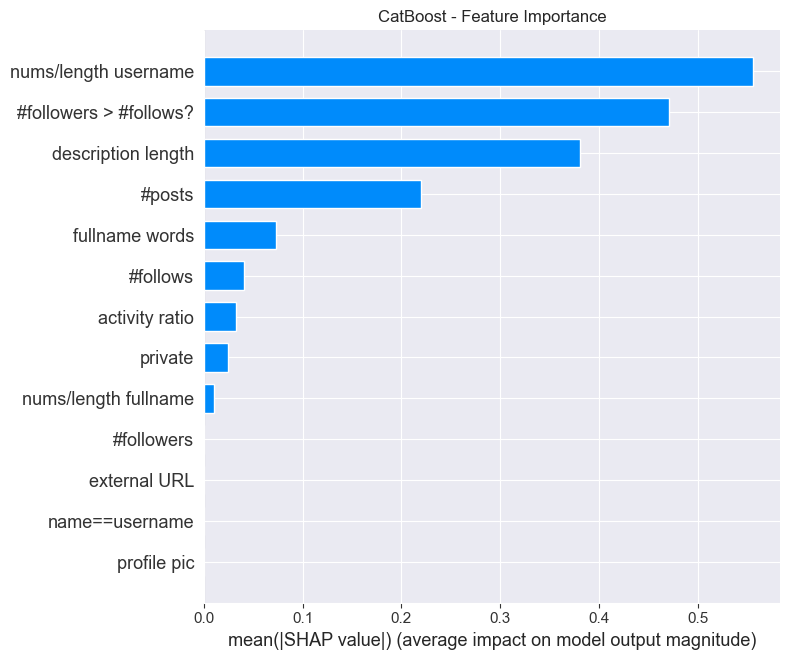

In [52]:
# Extracting the model and explainer
model = catboost_pipeline.named_steps['model']
explainer = shap.Explainer(model, X_train)

# Computing the SHAP values
shap_values = explainer(X)

# Summary plot
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title('CatBoost - Feature Importance')
plt.tight_layout()
plt.show()

## Model Explainability: SHAP Analysis

Using the SHAP library for model explainability, we generated a summary plot to visualize feature importance and the average impact each feature has on the model's predictions.

Upon analysis of the CatBoost - Feature Importance plot, we observed that the feature we created during the feature engineering process, `#followers > #follows?`, was the second most important feature on the plot. This indicates that the model relies significantly on this feature to predict whether an account is fake or not. Its high importance underscores its relevance in identifying patterns between real and fake accounts.

This finding validates the effectiveness of our feature engineering process and highlights the importance of the `#followers > #follows?` feature in distinguishing between real and fake Instagram accounts.



# Conclusion 

---

**Thorough Data Exploration:** Through multiple data treatment and analysis tasks, you meticulously identified patterns and differences between fake and real Instagram accounts. Key findings include the higher post count in real accounts and the tendency for fake accounts to follow more users.

**Baseline Model Establishment:** Developing a baseline model provided a benchmark for subsequent improvements. It also helped identify features with high predictive importance, guiding your feature engineering process effectively.

**Feature Engineering Impact:** The creation of new features uncovered significant patterns, such as the prevalence of fake accounts following more users than they have followers. This feature alone greatly influenced the final model's output, demonstrating the power of thoughtful feature engineering.

**Model Selection and Evaluation:** After testing various Gradient Boosting algorithms, the CatBoost model emerged as the top performer, achieving an impressive AUC-ROC score of 0.9214 on the test set. Notably, it correctly identified 89% of fake accounts, showcasing its effectiveness in classifying Instagram accounts.

---
